# Pymaceuticals Inc.
## -----------------------------------------------------------------------------

## Analysis
### In this pharmaceutical study, 249 mice with squamous cell carcinoma (SCC) were treated with a specific anti-cancer drug regimen and monitored for tumor development over 45 days. The regimen of interest, Capomulin, was compared against 8 additional treatments and one placebo control group. In reviewing the data we can make the following conclusions:
### 1.	Ramicane and Capomulin were the top two performing treatments during the course of the study. They had the lowest variance, standard deviation, and standard error of measurement, proving consistent results across the study. 
### 2.	Based on the boxplots comparing tumor volume, the Ramicane results are centrally disbursed with a mean and median closer in value at 40.2 and 40.7 than the larger difference between 40.7 and 41.6 of Capomulin. It should also be noted that the apparent central distribution of Infobinol is most likely attributed to the one outlier point  that is skewing the central tendency calculations.
### 3.	In comparing the weight of the mouse to the average tumor volume for the Capomulin regimen,  we can conclude that there is a strong correlation between the two factors based on Pearson’s Correlation Principle.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [34]:
# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

In [35]:
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Number of mice 
mice_count = len(mouse_study_df['Mouse ID'].unique())
mice_count

249

In [7]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_df = mouse_study_df[mouse_study_df["Mouse ID"].str.contains("g989")==False]
mouse_study_clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Number of mice in the clean DataFrame.
mice_clean = mouse_study_clean_df['Mouse ID'].unique()
mice_count_clean = len(mice_clean)
mice_count_clean

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_regimen = mouse_study_clean_df.groupby(['Drug Regimen'])
grouped_regimen.aggregate({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# Assemble the resulting series into a single summary DataFrame.
regimen_summary_df = pd.DataFrame(grouped_regimen.aggregate({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
                                 .rename(columns={'mean':'Mean Tumor Volume', 'median':'Median Tumor Volume', 'var':'Tumor Volume Variance',
                                                 'std':'Tumor Volume Std. Dev.', 'sem':'Tumor Volume Std. Err.'}))
regimen_summary_df  

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                            
             Tumor Volume Std. Dev. Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Number of Study Timepoints per Regimen'}, xlabel='Drug Regimen', ylabel='Number of Timepoints'>

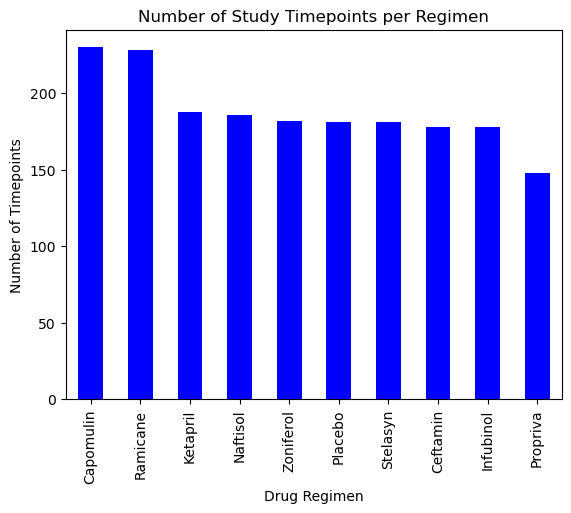

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_timepoints = grouped_regimen['Drug Regimen'].count().sort_values(ascending=False)
#office hours - sort values
regimen_timepoints.plot(kind="bar", color='b', title="Number of Study Timepoints per Regimen", ylabel="Number of Timepoints")

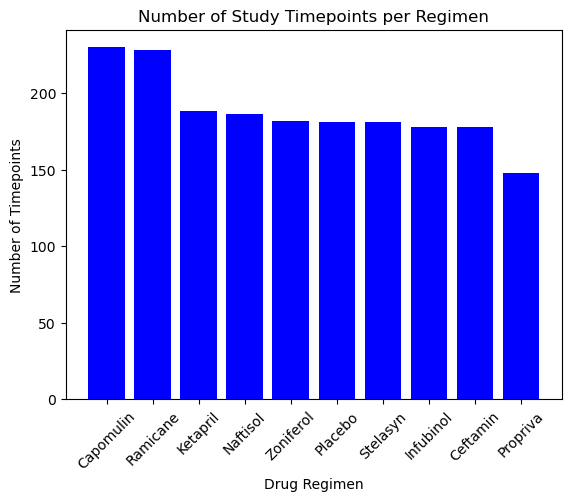

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis = mouse_study_clean_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(y_axis))
regimen_name = y_axis.index
plt.bar(x_axis, y_axis, color='b', align='center')
plt.title("Number of Study Timepoints per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(x_axis, regimen_name, rotation=45) 
plt.savefig("./Images/TimepointsPerRegimen.png")
plt.show()

<Axes: title={'center': 'Mouse Type'}, ylabel='Sex'>

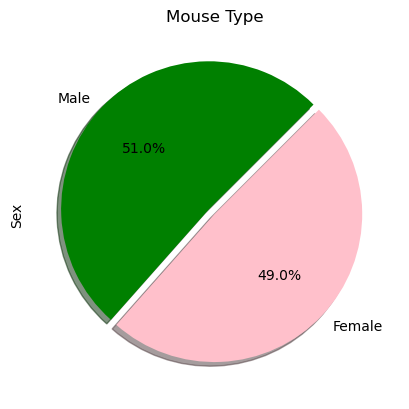

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_type = mouse_study_clean_df['Sex'].value_counts()
labels = ['Male', 'Female']
colors = ['green','pink']
explode = [0.05,0]
mouse_type.plot(kind="pie", colors=colors, explode=explode, autopct= "%1.1f%%", startangle= 45, shadow=True, title="Mouse Type")

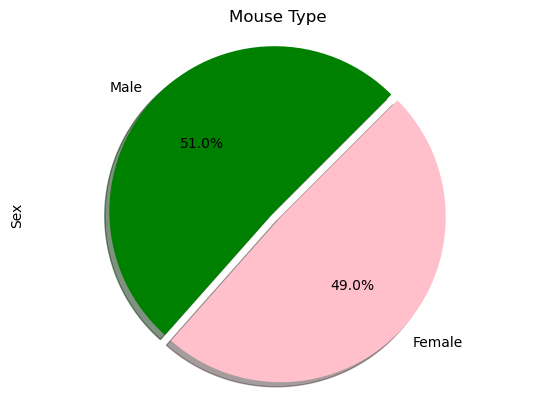

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_type, labels=labels, explode=explode, colors=colors, autopct= "%1.1f%%", startangle= 45, shadow=True)
plt.axis('equal')
plt.title('Mouse Type')
plt.ylabel('Sex')
plt.savefig("./Images/MouseType.png")
plt.show()

## Quartiles, Outliers, and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pd.DataFrame(mouse_study_clean_df.groupby('Mouse ID')['Timepoint'].max())

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [20]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_data = pd.merge(last_timepoint, mouse_study_clean_df, on=['Mouse ID','Timepoint'], how='left')
final_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_focus = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
max_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in regimen_focus:
    regimen_vol = final_data.loc[final_data['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    max_tumor_vol.append(regimen_vol.tolist()) 

    quartiles = regimen_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = regimen_vol.loc[(regimen_vol < lower_bound) | (regimen_vol > upper_bound)]

    print(f"{regimen}'s potential outliers: {outliers}")
   

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


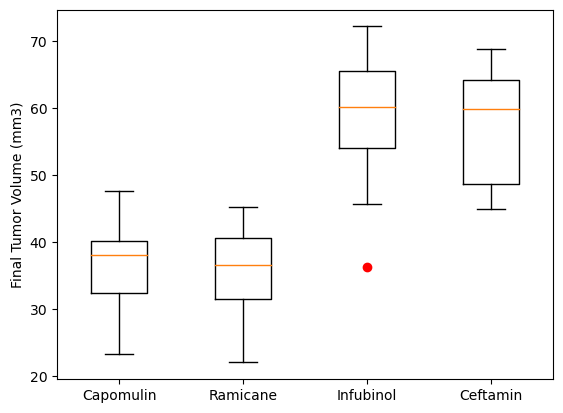

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(max_tumor_vol, labels=regimen_focus, sym="red")
plt.savefig("./Images/TumorVolDistribution.png")
plt.show()

## Line and Scatter Plots

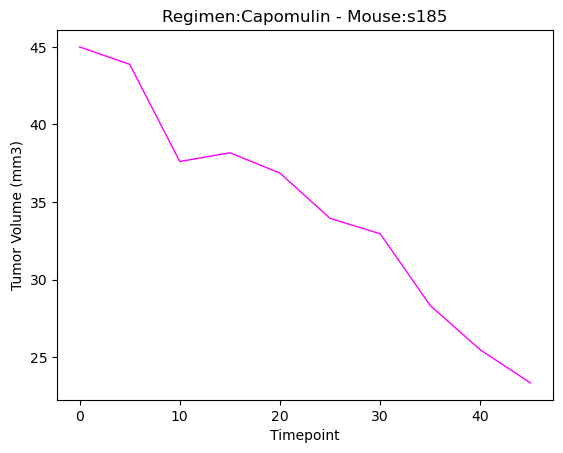

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = mouse_study_clean_df.loc[mouse_study_clean_df["Drug Regimen"] == "Capomulin"]
chosen_one = capomulin_mice.loc[capomulin_mice["Mouse ID"] == "s185"]
x_time = chosen_one['Timepoint']
y_vol = chosen_one['Tumor Volume (mm3)']
plt.plot(x_time, y_vol, linewidth=1, color='magenta')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Regimen:Capomulin - Mouse:s185')
plt.savefig("./Images/s185TumorvTime.png")
plt.show()

/var/folders/ct/thzz6hp5373259tbjv7gvv340000gn/T/ipykernel_92917/3090731513.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_vol = capomulin_mice.groupby(['Mouse ID']).mean()


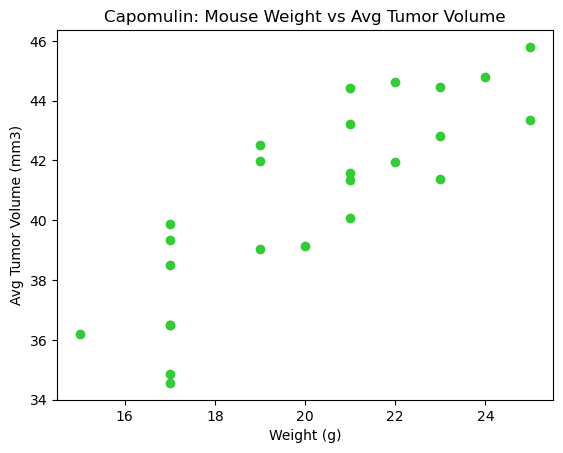

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_vol = capomulin_mice.groupby(['Mouse ID']).mean()
plt.scatter(avg_vol['Weight (g)'], avg_vol['Tumor Volume (mm3)'], color="limegreen")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.title('Capomulin: Mouse Weight vs Avg Tumor Volume')
plt.savefig("./Images/CapWtvAvgVol.png")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume under the Capomulin Regimen is 0.84


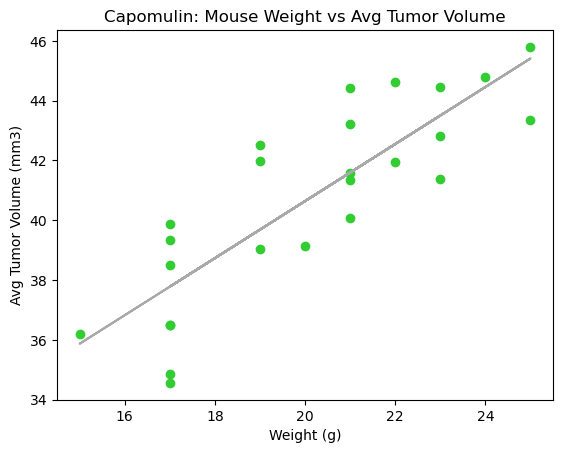

The linear regression model is y = 0.95x + 21.55


In [33]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_vol['Weight (g)'], avg_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume under the Capomulin Regimen is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_vol['Weight (g)'], avg_vol['Tumor Volume (mm3)'])
regress_values = avg_vol['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(avg_vol['Weight (g)'], avg_vol['Tumor Volume (mm3)'], color="limegreen")
plt.plot(avg_vol['Weight (g)'], regress_values, color='darkgrey')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.title('Capomulin: Mouse Weight vs Avg Tumor Volume')
plt.savefig("./Images/CapWtvAvgVolregression.png")
plt.show()
print(f"The linear regression model is {line_eq}")